In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import pandas as pd

# Trying to Find Whether Calories from different restaurants are different based on fat calories

nutrition = pd.read_csv('fastfood.csv')
print(len(nutrition))

print(nutrition.head())

print(nutrition.columns)
#print(nutrition['item'].unique())
#print(nutrition['restaurant'].value_counts())

calories_restaurants = pd.crosstab(nutrition['restaurant'], np.sum(nutrition['calories']))

print(calories_restaurants)

515
  restaurant                                       item  calories  cal_fat  \
0  Mcdonalds           Artisan Grilled Chicken Sandwich       380       60   
1  Mcdonalds             Single Bacon Smokehouse Burger       840      410   
2  Mcdonalds             Double Bacon Smokehouse Burger      1130      600   
3  Mcdonalds  Grilled Bacon Smokehouse Chicken Sandwich       750      280   
4  Mcdonalds   Crispy Bacon Smokehouse Chicken Sandwich       920      410   

   total_fat  sat_fat  trans_fat  cholesterol  sodium  total_carb  fiber  \
0          7      2.0        0.0           95    1110          44    3.0   
1         45     17.0        1.5          130    1580          62    2.0   
2         67     27.0        3.0          220    1920          63    3.0   
3         31     10.0        0.5          155    1940          62    2.0   
4         45     12.0        0.5          120    1980          81    4.0   

   sugar  protein  vit_a  vit_c  calcium  salad  
0     11     37.0   

In [117]:
# Group by restaurant and sum the calories column
total_calories_per_restaurant = nutrition.groupby('restaurant')['calories'].sum()

print(total_calories_per_restaurant)

# Group by restaurant and calculate the mean of the calories column
average_calories_per_restaurant = nutrition.groupby('restaurant')['calories'].mean()
average_calfat_per_restaurant = nutrition.groupby('restaurant')['cal_fat'].mean()
print(average_calories_per_restaurant)
print(average_calfat_per_restaurant)
# Inquire different menu items for each restaurants 
Arbys_restaurant_items = nutrition['item'][nutrition['restaurant'] == 'Arbys']
Bk_restaurant_items = nutrition['item'][nutrition['restaurant'] == 'Burger King']
Chick_restaurant_items = nutrition['item'][nutrition['restaurant'] == 'Chick Fil-A']
Sonic_restaurant_items = nutrition['item'][nutrition['restaurant'] == 'Sonic']
Dairy_restaurant_items = nutrition['item'][nutrition['restaurant'] == 'Dairy Queen']
Subway_restaurant_items = nutrition['item'][nutrition['restaurant'] == 'Subway']
Taco_restaurant_items = nutrition['item'][nutrition['restaurant'] == 'Taco Bell']
#print(Taco_restaurant_items)


restaurant
Arbys          29300
Burger King    42600
Chick Fil-A    10380
Dairy Queen    21850
Mcdonalds      36500
Sonic          33480
Subway         48290
Taco Bell      51020
Name: calories, dtype: int64
restaurant
Arbys          532.727273
Burger King    608.571429
Chick Fil-A    384.444444
Dairy Queen    520.238095
Mcdonalds      640.350877
Sonic          631.698113
Subway         503.020833
Taco Bell      443.652174
Name: calories, dtype: float64
restaurant
Arbys          237.836364
Burger King    333.757143
Chick Fil-A    145.370370
Dairy Queen    260.476190
Mcdonalds      285.614035
Sonic          338.301887
Subway         165.104167
Taco Bell      188.000000
Name: cal_fat, dtype: float64


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Mcdonalds'),
  Text(1, 0, 'Chick Fil-A'),
  Text(2, 0, 'Sonic'),
  Text(3, 0, 'Arbys'),
  Text(4, 0, 'Burger King'),
  Text(5, 0, 'Dairy Queen'),
  Text(6, 0, 'Subway'),
  Text(7, 0, 'Taco Bell')])

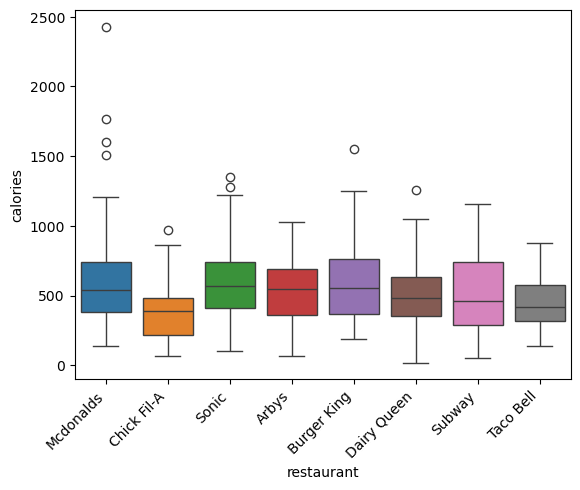

In [65]:
sns.boxplot(x = nutrition['restaurant'], y=nutrition['calories'], hue=nutrition['restaurant'])
plt.xticks(rotation=45, ha='right')


([<matplotlib.axis.XTick at 0x142e42710>,
 [Text(0, 0, '0'),
  Text(150, 0, '150'),
  Text(300, 0, '300'),
  Text(450, 0, '450'),
  Text(600, 0, '600'),
  Text(750, 0, '750'),
  Text(900, 0, '900'),
  Text(1050, 0, '1050'),
  Text(1200, 0, '1200'),
  Text(1350, 0, '1350'),
  Text(1500, 0, '1500'),
  Text(1650, 0, '1650'),
  Text(1800, 0, '1800'),
  Text(1950, 0, '1950'),
  Text(2100, 0, '2100'),
  Text(2250, 0, '2250'),
  Text(2400, 0, '2400')])

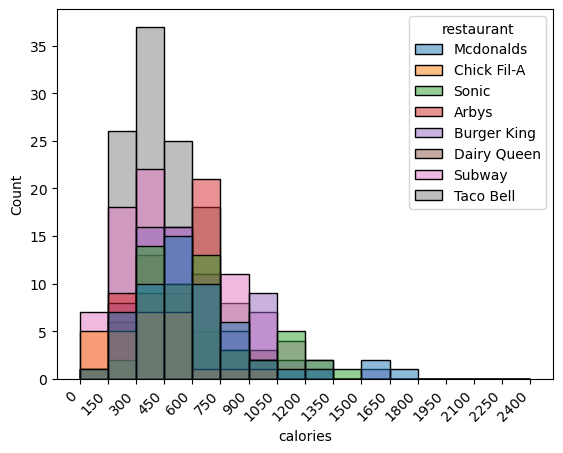

In [66]:

# Method 1: Using Seaborn's histplot with explicit bins
# Define the bin edges explicitly
bins = np.arange(0, 2500, 150)  # From -4 to 4 in steps of 0.5

# Create the histogram with these bins
sns.histplot(data=nutrition, bins=bins, x = 'calories', hue='restaurant')

# Optional: Rotate labels if they overlap
plt.xticks(bins, rotation=45, ha='right')


(57, 17)


<Axes: xlabel='item', ylabel='calories'>

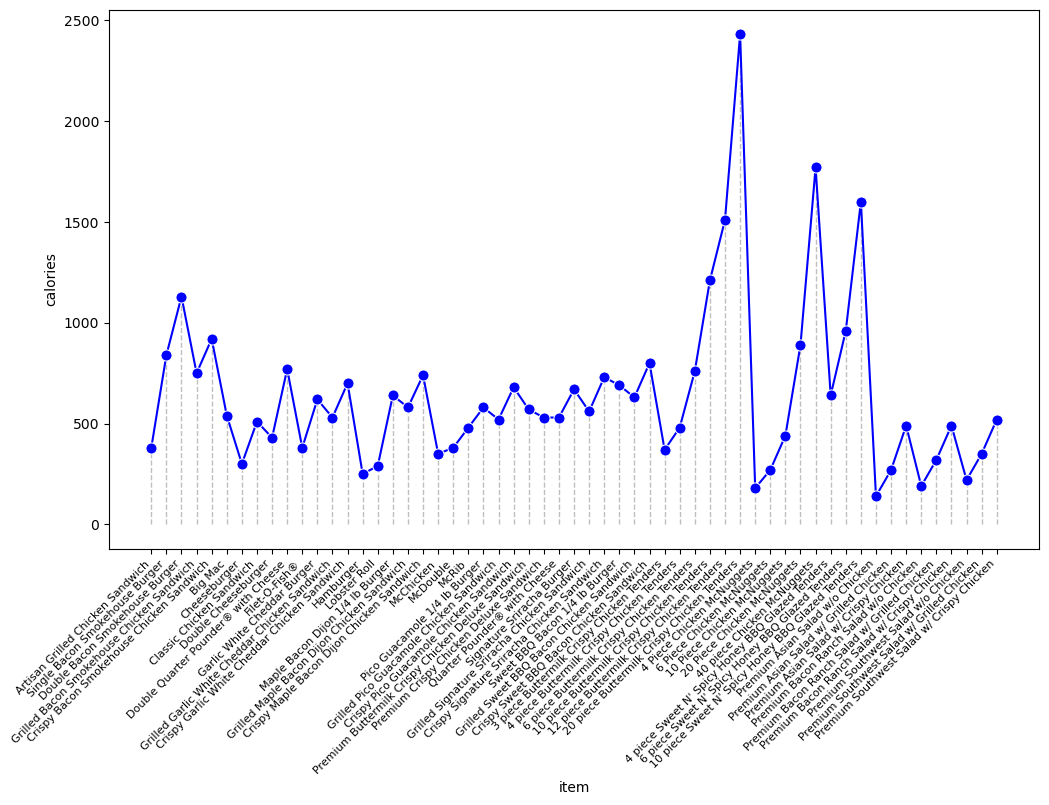

In [90]:
# Filter the DataFrame first, then use it in the lineplot
mcdonald_data = nutrition[nutrition['restaurant'] == 'Mcdonalds']
arbys_data = nutrition[nutrition['restaurant'] == 'Arbys']
subway_data = nutrition[nutrition['restaurant'] == 'Subway']
print(mcdonald_data.shape)

#Cluster less than 500 cal

# Now use the filtered DataFrame in the lineplot
plt.figure(figsize=(12, 7))
plt.xticks(rotation=45, fontsize=8, ha='right')
plt.vlines(x=mcdonald_data['item'], ymin=0, ymax=mcdonald_data['calories'], colors='gray', linestyles='dashed', alpha=0.5, linewidth=1)
#plt.hlines(xmax=mcdonald_data['item'], xmin=0, y=mcdonald_data['calories'], colors='gray', linestyles='dashed', alpha=0.5, linewidth=1)
sns.lineplot(data=mcdonald_data, x="item", y="calories", color='blue', marker='o', markersize=8)


<Figure size 1200x600 with 0 Axes>

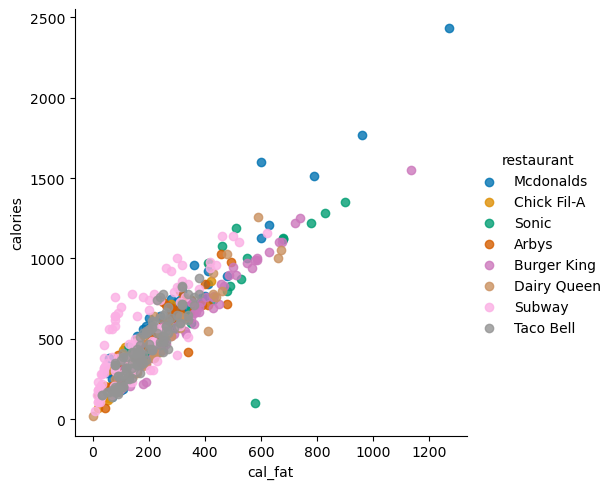

In [94]:
plt.figure(figsize=(12,6))
sns.lmplot(x='cal_fat', y='calories', hue='restaurant', palette='colorblind', data=nutrition, fit_reg=False)

In [181]:
# One sonic outlier in the previous graph
sonic_restaurant = nutrition[nutrition['restaurant'] == 'Sonic']
#print(sonic_restaurant)

uniques_sonic_item = sonic_restaurant[(sonic_restaurant['cal_fat'] < 600) & (sonic_restaurant['calories'] < 200)]

print(uniques_sonic_item)

combined_data = nutrition[(nutrition['restaurant'] == "Mcdonalds") | 
                          (nutrition['restaurant'] == "Sonic") | 
                          (nutrition['restaurant'] == "Subway")]
print(combined_data)

    restaurant                   item  calories  cal_fat  total_fat  sat_fat  \
127      Sonic  Ultimate Chicken Club       100      580         64     15.0   

     trans_fat  cholesterol  sodium  total_carb  fiber  sugar  protein  vit_a  \
127        0.5          100    2070          65    4.0     12     39.0   15.0   

     vit_c  calcium  salad  
127    8.0     30.0  Other  
    restaurant                                       item  calories  cal_fat  \
0    Mcdonalds           Artisan Grilled Chicken Sandwich       380       60   
1    Mcdonalds             Single Bacon Smokehouse Burger       840      410   
2    Mcdonalds             Double Bacon Smokehouse Burger      1130      600   
3    Mcdonalds  Grilled Bacon Smokehouse Chicken Sandwich       750      280   
4    Mcdonalds   Crispy Bacon Smokehouse Chicken Sandwich       920      410   
..         ...                                        ...       ...      ...   
395     Subway             Turkey, Bacon & Guacamole Wrap 

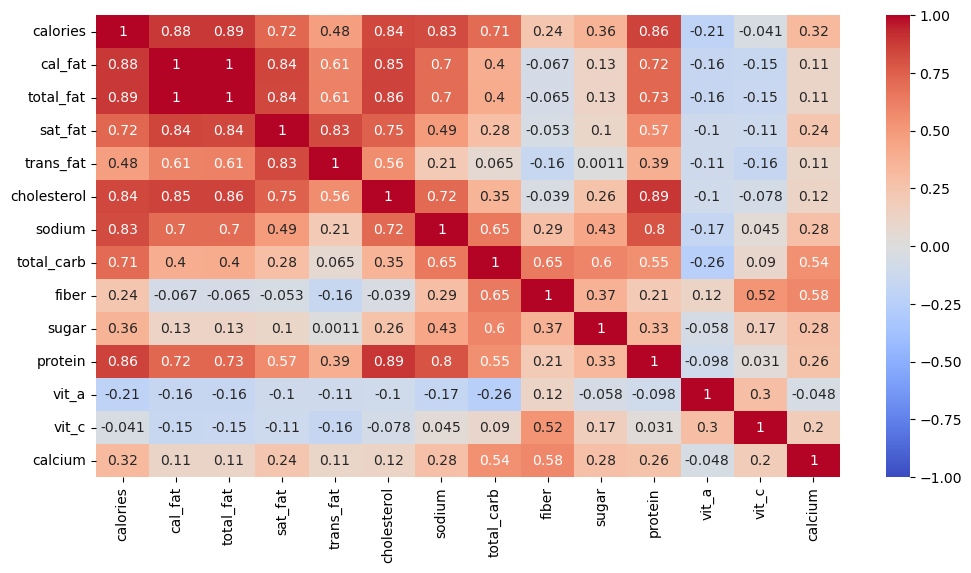

Intercept               171.579700
restaurant[T.Sonic]     -95.128018
restaurant[T.Subway]     60.459791
cal_fat                   1.641275
dtype: float64


<Figure size 1200x600 with 0 Axes>

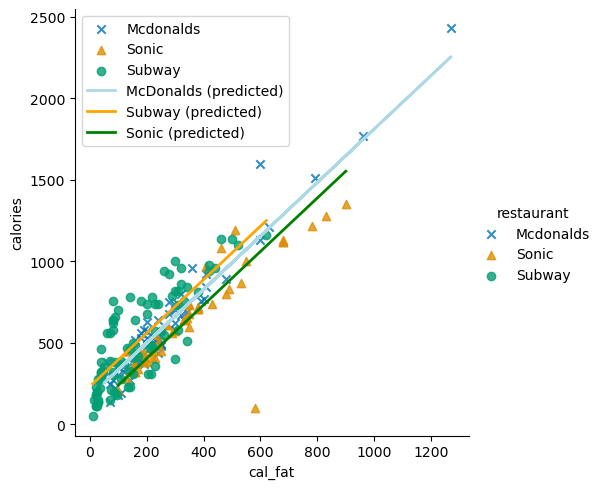

<Figure size 640x480 with 0 Axes>

In [187]:
corrs = combined_data.select_dtypes(include='number').corr()

plt.figure(figsize=(12,6))
sns.heatmap(corrs, xticklabels=corrs.columns, yticklabels=corrs.columns, vmin=-1, center=0, vmax=1, cmap='coolwarm', annot=True)
plt.show()

model = sm.OLS.from_formula('calories ~ cal_fat + restaurant', data=combined_data).fit()
print(model.params)

# Filter data for each restaurant
mcdonald_data = combined_data[combined_data['restaurant'] == 'Mcdonalds']
subway_data = combined_data[combined_data['restaurant'] == 'Subway']
sonic_data = combined_data[combined_data['restaurant'] == 'Sonic']

# Calculate predictions for each restaurant's data separately
equation_mcdonald = model.predict(mcdonald_data)
equation_subway = model.predict(subway_data)
equation_sonic = model.predict(sonic_data)

plt.figure(figsize=(12,6))
# Create scatter plot
sns.lmplot(x='cal_fat', y='calories', hue='restaurant', palette='colorblind', data=combined_data, markers=['x','^','o'], fit_reg=False)

# Plot regression lines for each restaurant using their respective data
plt.plot(mcdonald_data['cal_fat'], equation_mcdonald, color='lightblue', linewidth=2, label='McDonalds (predicted)')
sub_sorted = subway_data.sort_values('cal_fat')
plt.plot(sub_sorted['cal_fat'], model.predict(sub_sorted), color='orange', linewidth=2, label='Subway (predicted)')
son_sorted = sonic_data.sort_values('cal_fat')
plt.plot(son_sorted['cal_fat'], model.predict(son_sorted), color='green', linewidth=2, label='Sonic (predicted)')

plt.legend()
plt.show()
plt.clf()

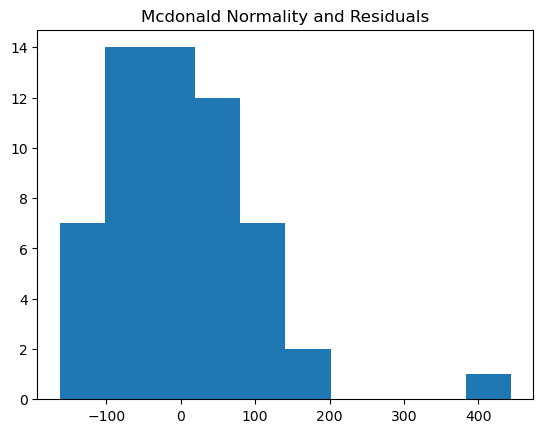

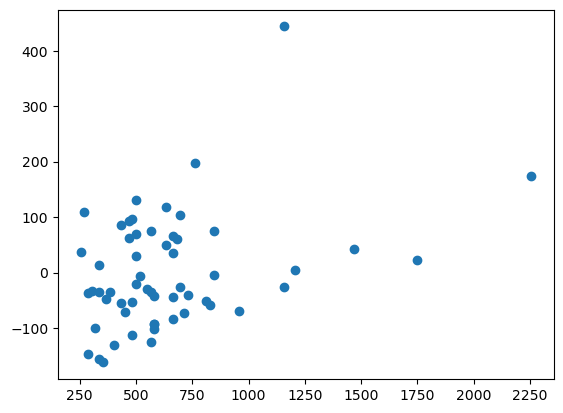

In [188]:
# Checking are the linear regression assumptions are met or not

#Calculating the residuals
mcdonald_residuals = mcdonald_data['calories'] - equation_mcdonald
subway_residuals = subway_data['calories'] - equation_subway
sonic_residuals = sonic_data['calories'] - equation_sonic


plt.title('Mcdonald Normality and Residuals')
plt.hist(mcdonald_residuals)
plt.show()
plt.clf()
plt.scatter(equation_mcdonald, mcdonald_residuals)
plt.show()

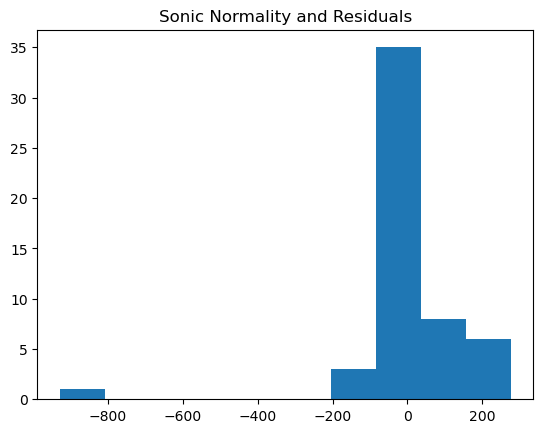

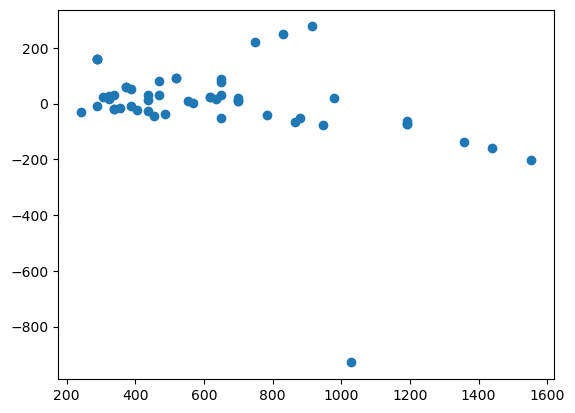

In [189]:
plt.title('Sonic Normality and Residuals')
plt.hist(sonic_residuals)
plt.show()
plt.clf()
plt.scatter(equation_sonic, sonic_residuals)
plt.show()


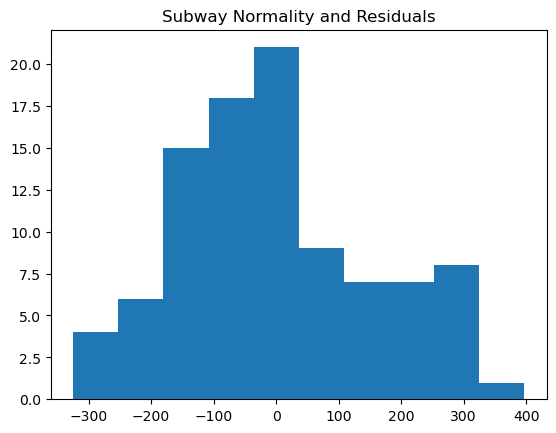

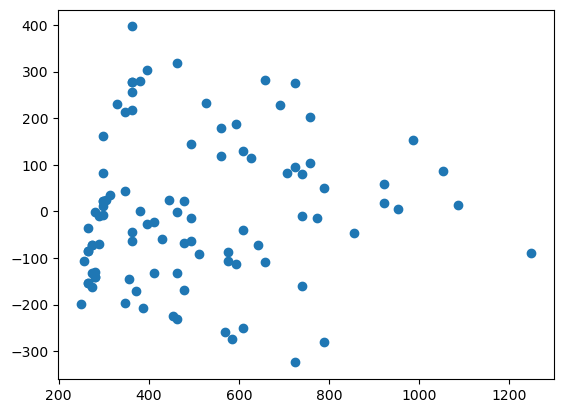

In [190]:
plt.title('Subway Normality and Residuals')
plt.hist(subway_residuals)
plt.show()
plt.clf()
plt.scatter(equation_subway, subway_residuals)
plt.show()

In [ ]:
#"Meskipun lmplot menunjukkan bahwa bentuk fungsional linier sekarang sesuai, 
# plot residual masih menunjukkan tanda-tanda kemiringan atau heteroskedastisitas. 
# Model tersebut masih melanggar asumsi kesalahan yang terdistribusi normal/varians konstan. "
# Transformasi lebih lanjut (mungkin akar kuadrat) atau model yang berbeda sama sekali (seperti Gamma GLM) mungkin diperlukan."